### ETAS: Mexico 2017
#### 19 September 2017,  04:49:21 UTC m=7.1
2017-09-19 18:14:39 UTC 18.584°N   -98.399 W 51.0 km depth

lon: -98.399
lat: 18.584

In [33]:
#
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import datetime as dtm
import matplotlib.dates as mpd
import pytz
tzutc = pytz.timezone('UTC')

#import operator
import math
import random
import numpy
import scipy
import scipy.optimize as spo
from scipy import interpolate
import itertools
import sys
#import scipy.optimize as spo
import os
import operator
#from PIL import Image as ipp
import multiprocessing as mpp
#
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import json
import pickle
#
import geopy.distance
#from geopy.distance import vincenty
#from geopy.distance import great_circle
#
#import shapely.geometry as sgp
#
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from geographiclib.geodesic import Geodesic as ggp
#
#import ANSStools as atp
from yodiipy import ANSStools as atp
#
import contours2kml
import globalETAS as gep
import global_etas_auto as ggep
from eq_params import *
#
from nepal_figs import *
import optimizers
#
import random
import geopy

#
# on a fresh linux install... (can we script this?)
# stuff we have to do besides just clone this:
# pip install geopy
# conda install basemap
# pip install geographiclib
# conda install -c ioos rtree


failed while loading urllib and/or urllib. maybe python 3.x?


/home/myoder/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
# event was some time on the 24th or maybe late the 23rd. this, plus defaults, should find the event:
#to_dt = dtm.datetime(2016,8,25, tzinfo=pytz.timezone('UTC'))
#to_dt = dtm.datetime.now(pytz.timezone('UTC'))
to_dt = dtm.datetime(2017, 9, 19, 0,0,0, tzinfo=pytz.timezone('UTC'))
#
Lr_factor = 10.
# define these from the t_now in the actual etas object, in the event that we load it from pickle,
#  rather than calc it here.
#f_path = '/home/myoder/Dropbox/Research/etas/italy_2016_10/etas_{}'.format(to_dt)
#f_root = 'etas_2016'
#
# USGS:
# italy
#lat0 = 42.934
#lon0 = 13.043
#t0   = dtm.datetime(2016, 10, 26, 19, 18, 8, tzinfo=pytz.timezone('UTC'))
#m0   = 6.1
#
# newest event:
# 2016-11-13 11:02:56
t0 = dtm.datetime(2017, 9, 19, 18, 14, 39, tzinfo=pytz.timezone('UTC'))
t_ms = t0
#Location
lon0 = -98.399
lat0 = 18.584

m0 = 7.1
d_lat = 5.5
d_lon = 5.5
#d_lat = 2.5
#d_lon = 2.5
#
lats = [lat0-d_lat, lat0+d_lat]
lons = [lon0-d_lon, lon0+d_lon]


In [4]:
#etas = ggep.auto_etas(to_dt=to_dt, Lr_factor=Lr_factor, dt_0=5)
#italy_prams = {'do_recarray': True, 'D_fract': 1.5,
#                't_0':dtm.datetime(1990, 1, 1, 0, 0, tzinfo=pytz.timezone('UTC')),
#                't_now':to_dt, 
#                'lats': [42.,43.5], 'p': 1.1, 'b1': 1.0, 'mc': 2.5, 'q': 1.5,
#                'lons': [12.,15.], 'dmstar': 1.0, 'b2': 1.5, 'd_tau': 2.28,
#                'incat': None, 'fit_factor': 2.0, 'd_lambda': 1.76}
cat_len_days = 3650
eq_prams = {'do_recarray': True, 'D_fract': 1.5,
               't_0':dtm.datetime(1990, 1, 1, 0, 0, tzinfo=pytz.timezone('UTC')),
               't_now':to_dt, 'cat_len':3650,
               'lats': lats, 'p': 1.1, 'b1': 1.0, 'mc': 2.5, 'q': 1.5,
               'lons': lons, 'dmstar': 1.0, 'b2': 1.5, 'd_tau': 2.28,
               'incat': None, 'fit_factor': 2.0, 'd_lambda': 1.76, 'etas_range_padding':5.}

#nz_cat0 = test_cat = atp.cat_from_geonet(lats=lats, lons=lons, m_c=2.5, date_from=dtm.datetime(2000,1,1,tzinfo=atp.tzutc),
#                              date_to=dtm.datetime.now(atp.tzutc))
#nz_cat = gep.make_ETAS_catalog_mpp(incat=nz_cat0)
#
# TODO: integrate this directly into the globalETAS() class...
#my_cat = None
my_cat = atp.cat_from_anss_and_usgs(lons=lons, lats=lats, mc=eq_prams['mc'], cat_len_days=cat_len_days, 
                                    Nmax=None, rec_array=True)
if not my_cat is None:
    my_cat = gep.make_ETAS_catalog_mpp(incat=my_cat)
#
etas_name = 'Mexico, Sept. 19 2017'
f_path = '/home/myoder/Dropbox/Research/etas/Mexico_2017_09_19/etas_{}'.format(eq_prams['t_now'])
f_root = 'etas_Mexico_20170919'

print('etas_name: {}'.format(etas_name))
print('f_path: {}'.format(f_path))
print('f_root: {}'.format(f_root))



url_str: http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.csv
data handle fetched...
 no file.
etas_prams:  {'do_recarray': False, 'b2': 1.5, 'b1': 1.0, 'dmstar': 1.0, 'q': 1.5, 'p': 1.1, 'fit_factor': 1.5, 'd_tau': 2.28, 'd_lambda': 1.76, 'D_fract': 1.5, 'date_range': ['1990-1-1', None], 'mc': 2.5, 'lons': [-117.0, -114.0], 'lats': [32.0, 38.0], 'incat': None}
results fetched.
etas_name: Mexico, Sept. 19 2017
f_path: /home/myoder/Dropbox/Research/etas/Mexico_2017_09_19/etas_2017-09-19 00:00:00+00:00
f_root: etas_Mexico_20170919


In [5]:
#etas = gep.ETAS_mpp(n_cpu=2*mpp.cpu_count(), catalog=nz_cat, **eq_prams)
etas = gep.ETAS_mpp(n_cpu=2*mpp.cpu_count(), catalog=my_cat, **eq_prams)
#
# we've run this; we can reload it from pickle:
#with open('data/etas_201610.pkl', 'rb') as fin:
#    etas = pickle.load(fin)
#

begin globalETAS.__init()__
Overriding t_0 (etas catalog start date/time) for ETAS calculations. using catalog start, t_0 = t_now - catlen (3650.000000) = 2007-09-22 00:00:00+00:00
ETAS over etas_cat_range/xyz_range:  ([0, 3830], None)
make_etas():
etas_mpp worker xyz_range:  [0, 1512]
begin globalETAS.__init()__
Overriding t_0 (etas catalog start date/time) for ETAS calculations. using catalog start, t_0 = t_now - catlen (3650.000000) = 2007-09-22 00:00:00+00:00
ETAS over etas_cat_range/xyz_range:  ([0, 3830], [0, 1512])
etas_mpp worker xyz_range:  [1512, 3025]
begin globalETAS.__init()__
Overriding t_0 (etas catalog start date/time) for ETAS calculations. using catalog start, t_0 = t_now - catlen (3650.000000) = 2007-09-22 00:00:00+00:00
ETAS over etas_cat_range/xyz_range:  ([0, 3830], [1512, 3025])
etas_mpp worker xyz_range:  [3025, 4537]
begin globalETAS.__init()__
Overriding t_0 (etas catalog start date/time) for ETAS calculations. using catalog start, t_0 = t_now - catlen (3650.0

In [6]:
#print(etas.t0, etas.t_now, etas.t_forecast, etas.catalog[-1])
print(to_dt)
print(etas.t_0, mpd.num2date(etas.t_forecast), etas.t_now, t_ms)
#print(etas.catalog[-5:])
#
print('t_now: ', etas.t_now, max(etas.catalog['event_date']))

2017-09-19 00:00:00+00:00
2007-09-22 00:00:00+00:00 2017-09-19 00:00:00+00:00 2017-09-19 00:00:00+00:00 2017-09-19 18:14:39+00:00
t_now:  2017-09-19 00:00:00+00:00 2017-09-20T10:39:28.000940


ms:  (datetime.datetime(2017, 9, 19, 18, 14, 39, 300), 18.583799362182617, -98.39929962158203, 7.099999904632568, 51.0099983215332, 736591.7601736146, 61.65949341619362, 1277.0381711191155, 1.4058149313179132e-05, 18.620869322135082, 165.68087621973297, 0.0015068598352869903, 1.0, 1.1, 1.5, array([ 8.71608884,  0.77433569]), array([[ 0.96242636,  0.27154283],
       [-0.27154283,  0.96242636]]), 31.0) -98.3992996216 18.5837993622


/home/myoder/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/home/myoder/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/myoder/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/myoder/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/myoder/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: ax

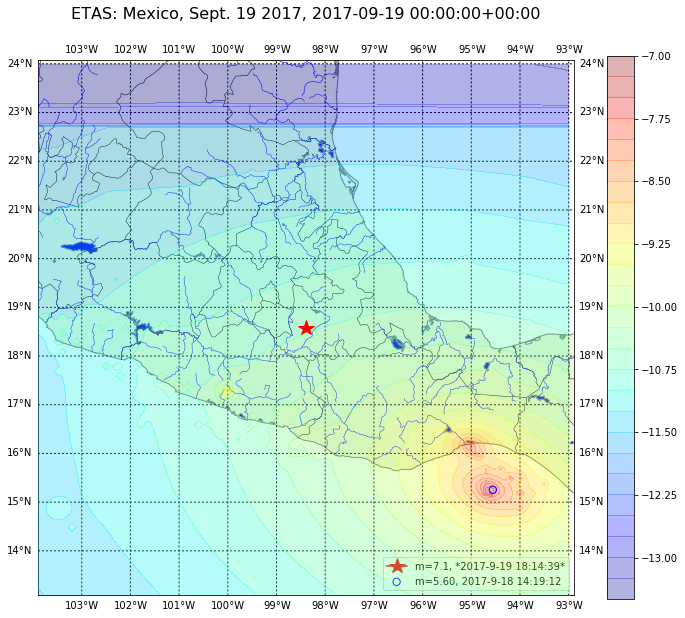

In [21]:
fg=plt.figure(0, figsize=(12,10))
ax=plt.gca()
etas.make_etas_contour_map(n_contours=25, fignum=0, map_resolution='f', alpha=.3, ax=ax)
#
#mainshock = sorted(etas.catalog, key=lambda rw: rw['mag'])[-1]
#print('mainshock: ', mainshock)
# get mainshock. it's an m>6 event in the last week or so... this is subjective.
# if we just look for the biggest event, we get the L'Aquila event, so we'll need to be more creative...
# or just specify it.

mainshock = etas.catalog[-1]
for j,eq in enumerate(reversed(etas.catalog)):
    #print('*** ', pytz.utc.localize(eq['event_date'].astype(dtm.datetime)))
    if pytz.utc.localize(eq['event_date'].astype(dtm.datetime))<etas.t_now-dtm.timedelta(days=180): break
    if eq['mag']>mainshock['mag']:
        mainshock = eq
        #
    #
#
print('ms: ', mainshock, mainshock['lon'], mainshock['lat'])
x,y = etas.cm(mainshock['lon'], mainshock['lat'])

#print('mm: ', max(etas.catalog['mag']))

#
# let's get everything m>6 in the last 6 months?
m6s = [rw for rw in etas.catalog if rw['mag'] >= 5.5
       and pytz.utc.localize(rw['event_date'].astype(dtm.datetime))>t_ms-dtm.timedelta(days=180)]

# plot mainshock:
dt = mainshock['event_date'].astype(dtm.datetime)
#dt=t0
dt_str = '{}-{}-{} {}:{}:{}'.format(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)
#etas.cm.plot([x], [y], latlon=False, marker='*', color='r', ms=16, zorder=11,
#                   label='m={}, {}'.format(mainshock['mag'], dt_str))
etas.cm.plot([mainshock['lon']], [mainshock['lat']], latlon=False, marker='*', color='r', ms=16, zorder=11,
                   label='m={}, *{}*'.format(m0, dt_str))

ax.set_title('ETAS: {}, {}\n\n'.format(etas_name, etas.t_now), size=16)
#for j,m6 in enumerate(m6s):
for j,m6 in enumerate(sorted(sorted(m6s, key=lambda rw:rw['mag'])[:-1], key=lambda rw:rw['event_date'])):
    clr = colors_[j%len(colors_)]
    #
    dt = m6['event_date'].astype(dtm.datetime)
    dt_str = '{}-{}-{} {}:{}:{}'.format(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)
    etas.cm.scatter(m6['lon'], m6['lat'], s=3*(m6['mag']+12.), edgecolors=clr, latlon=False,
                          c='none', marker='o', zorder=11, label='m={:.2f}, {}'.format(m6['mag'], dt_str))
    #
plt.gca().legend(loc=0)

(0, 21.111281828634674)

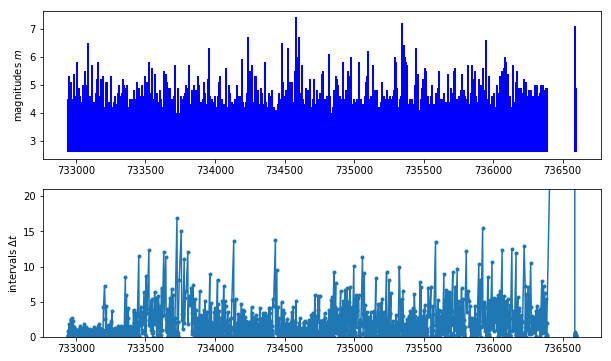

In [23]:
plt.figure(figsize=(10,6))
plt.clf()
ax1 = plt.subplot('211')
ax2 = plt.subplot('212', sharex=ax1)
#ax1.plot(etas.catalog['event_date'], etas.catalog['mag'], marker='.', ls='-', label='mag')
f_dates = [mpd.date2num(x.astype(dtm.datetime)) for x in etas.catalog['event_date']]
ax1.vlines(f_dates, (min(etas.catalog['mag'])-.5)*numpy.ones(len(etas.catalog)), 
           etas.catalog['mag'], lw=2., label='mag', color='b')
ax2.plot(f_dates[1:], numpy.diff(f_dates,1), '.-')

ax2.set_ylabel('intervals $\Delta t$')
ax1.set_ylabel('magnitudes $m$')
ax2.set_ylim(0, 1.25*sorted(numpy.diff(f_dates))[-2])

/home/myoder/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/home/myoder/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/myoder/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/myoder/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/myoder/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: ax

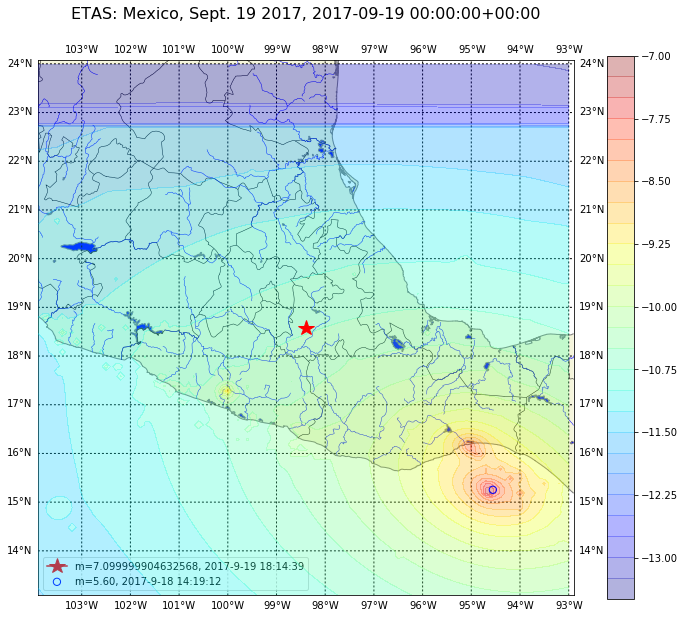

In [24]:
fg=plt.figure(0, figsize=(12,10))
ax=plt.gca()
etas.make_etas_contour_map(n_contours=25, fignum=0, map_resolution='f', alpha=.3, ax=ax)

#
# let's get everything m>6 in the last 6 months?
m6s = [rw for rw in etas.catalog if rw['mag'] >= 5.5 
       and pytz.utc.localize(rw['event_date'].astype(dtm.datetime))>to_dt-dtm.timedelta(days=120)]
#
# plot mainshock:
dt = mainshock['event_date'].astype(dtm.datetime)
dt_ms_str = '{}-{}-{} {}:{}:{}'.format(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)
etas.cm.plot([x], [y], latlon=False, marker='*', color='r', ms=16, zorder=11,
                   label='m={}, {}'.format(mainshock['mag'], dt_ms_str))
ax.set_title('ETAS: {}, {}\n\n'.format(etas_name, etas.t_now), size=16)
#for j,m6 in enumerate(m6s):
for j,m6 in enumerate(sorted(sorted(m6s, key=lambda rw:rw['mag'])[:-1], key=lambda rw:rw['event_date'])):
    clr = colors_[j%len(colors_)]
    #
    dt = m6['event_date'].astype(dtm.datetime)
    dt_str = '{}-{}-{} {}:{}:{}'.format(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)
    etas.cm.scatter(m6['lon'], m6['lat'], s=3*(m6['mag']+12.), edgecolors=clr, 
                          c='none', marker='o', zorder=11, label='m={:.2f}, {}'.format(m6['mag'], dt_str))
    #
plt.gca().legend(loc=0)

In [25]:
#print(['{},{}\n'.format(rw['event_date'], rw['mag'] ) for rw in etas.catalog if rw['mag'] >= 5.5])
#len(['{},{}\n'.format(rw['event_date'], rw['mag'] ) for rw in etas.catalog if rw['mag'] >= 5.5
#     and rw['event_date'].astype(dtm.datetime)>dtm.datetime(2016,10,20)])

print(dt, type(dt), dt.year)

2017-09-18 14:19:12.000870 <class 'datetime.datetime'> 2017


In [26]:
for rw in m6s:
    print(rw)

(datetime.datetime(2017, 9, 18, 14, 19, 12, 870), 15.253700256347656, -94.55760192871094, 5.599999904632568, 10.0, 736590.5966666767, 10.964780757544764, 31.554479555844246, 0.0028281313777386075, 3.311310851257825, 2.9462689081875832, 0.0712972628144529, 1.0, 1.1, 1.5, array([ 8.71608884,  0.77433569]), array([[ 0.96242636,  0.27154283],
       [-0.27154283,  0.96242636]]), 26.0)
(datetime.datetime(2017, 9, 19, 18, 14, 39, 300), 18.583799362182617, -98.39929962158203, 7.099999904632568, 51.0099983215332, 736591.7601736146, 61.65949341619362, 1277.0381711191155, 1.4058149313179132e-05, 18.620869322135082, 165.68087621973297, 0.0015068598352869903, 1.0, 1.1, 1.5, array([ 8.71608884,  0.77433569]), array([[ 0.96242636,  0.27154283],
       [-0.27154283,  0.96242636]]), 31.0)


In [27]:
## hey, pickling works with the new ETAS objects (or at least it appears to...):
# with open('data/etas_201610.pkl', 'wb') as fpkl:
#     pickle.dump( etas, fpkl)    
#
#with open('data/etas_201610.pkl', 'rb') as fin:
#    etas2 = pickle.load(fin)
#
#print(etas2.catalog[0:5])
# TODO: we want the datetime part of the filename to come from the etas object itself, for purposes of
# integrity. BUT, we want this script to be a bit more portable, so we should replace all the etas
# references/object name to just 'etas'
#
etas.export_kml(os.path.join(f_path, '{}_{}.kml'.format(f_root, str(etas.t_now).replace(' ', '_'))), 
                kml_contours_bottom=.25, kml_contours_top=1.0)

etas.export_xyz(os.path.join(f_path, '{}_{}.xyz'.format(f_root, str(etas.t_now).replace(' ', '_'))))
fg.savefig(os.path.join(f_path, '{}_{}.png'.format(f_root, str(etas.t_now).replace(' ', '_'))))

with open (os.path.join(f_path, '{}_{}.pkl'.format(f_root, str(etas.t_now).replace(' ', '_'))), 'wb') as fpkl:
    pickle.dump(etas, fpkl)

kml bottom, top:  6 26


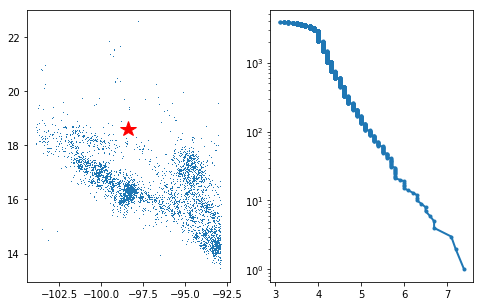

In [28]:
plt.figure(figsize=(8,5))
plt.clf()
ax1=plt.subplot('121')
ax2=plt.subplot('122')
ax1.plot(etas.catalog['lon'], etas.catalog['lat'], ',')
ax1.plot([mainshock['lon']], [mainshock['lat']], marker='*', color='r', ms=16, zorder=11)
#
ax2.plot([m for m in reversed(sorted(etas.catalog['mag']))], numpy.arange(1,len(etas.catalog)+1),
         '.-', lw=2.)
ax2.set_yscale('log')

In [29]:
#print(etas.mc, etas.mc_etas)

In [30]:
# plot a cross-section of ETAS. let's get smart about this and do a PCA on the xyz field...
#
#plt.figure()
##my_xy = [[x,y,z] for x,y in zip(etas.catalog['lon'], etas['lat']) if x>=42.25 and x<=42.75]
#my_xyz = [[x,y,z] for x,y,z in etas.ETAS_array if y>=42.25 and y<=42.75]
#plt.figure(figsize=(8,6))
#plt.plot([x for x,y,z in my_xyz ], [z for x,y,z in my_xyz], '.')

In [31]:
mycat = atp.catfromANSS(lon=lons, lat=lats, minMag=2.5,
                        dates0=[dtm.datetime(2005,1,1, tzinfo=tzutc), None], Nmax=None, fout=None, rec_array=True)


data handle fetched...
 no file.


data handle fetched...
 no file.
[ (datetime.datetime(2017, 2, 21, 10, 40, 27, 810000), 16.1932, -98.6763, 4.7, 10.0, 736381.4447663195)
 (datetime.datetime(2017, 2, 21, 11, 56, 28, 990000), 16.5654, -98.579, 4.9, 10.93, 736381.4975577546)
 (datetime.datetime(2017, 2, 23, 9, 47, 55, 710000), 16.1889, -95.4139, 4.8, 75.03, 736383.4082836806)
 (datetime.datetime(2017, 2, 23, 15, 21, 14, 830000), 16.1597, -95.5135, 4.9, 55.62, 736383.6397549768)
 (datetime.datetime(2017, 2, 23, 17, 7, 8, 300000), 16.4665, -98.612, 4.5, 21.35, 736383.7132905093)]
2017-02-23T17:07:08.300000


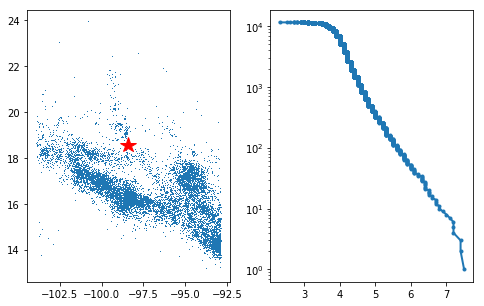

In [32]:
test_cat = atp.catfromANSS(lat=lats, lon=lons, minMag=1.5,
                           dates0=[dtm.datetime(1990,1,1, tzinfo=pytz.utc), dtm.datetime.now(pytz.utc)])


plt.figure()
plt.clf()
#plt.plot(test_cat['lon'], test_cat['lat'], '.')
print(test_cat[-5:])
print(max(test_cat['event_date']))

plt.figure(figsize=(8,5))
plt.clf()
ax1=plt.subplot('121')
ax2=plt.subplot('122')
ax1.plot(test_cat['lon'], test_cat['lat'], ',')
ax1.plot([mainshock['lon']], [mainshock['lat']], marker='*', color='r', ms=16, zorder=11)
#
ax2.plot([m for m in reversed(sorted(test_cat['mag']))], numpy.arange(1,len(test_cat)+1),
         '.-', lw=2.)
ax2.set_yscale('log')